<a href="https://colab.research.google.com/github/minjeong-kim-git/Kaggle-Practice/blob/main/Day%2008/ML04_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day04 : Multilayer Perceptron

- **Team ID** : 03조

- Write and run the code below in jupyter notebook
- After completion, rename the file, and summit the file to e-class
- Submit file name : **“ML01\_<#조\>.ipynb”**, send me 김동현 <donghyunkim1217@gmail.com>
  - Ex) ML01\_#조\.ipynb
- Due : **오늘 16:59pm**

# 1. Multilayer perceptron and backpropagation

### Sigmoid activation function

In [1]:
import numpy as np

# sigmoid function
def sigmoid(z):
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))  # np.clip - preventing overflow

In [2]:
# test sigmoid
z = np.array([[1.0, 0.0, -1.0],
              [-1.0, 0.0, 1.0]])

print("sigmoid of z = \n", sigmoid(z))

sigmoid of z = 
 [[0.73105858 0.5        0.26894142]
 [0.26894142 0.5        0.73105858]]


### Softmax function

In [3]:
# softmax function for 2D array
def softmax(z):
    exps = np.exp(z)
    return exps / np.sum(exps, axis = 1, keepdims = True)

In [4]:
# test softmax
z = np.array([[1.0, 0.0, -1.0],
              [-1.0, 0.0, 1.0]])

print("softmax of z = \n", softmax(z))
print("sum of softmax values = \n", np.sum(softmax(z), axis=1, keepdims=True))

softmax of z = 
 [[0.66524096 0.24472847 0.09003057]
 [0.09003057 0.24472847 0.66524096]]
sum of softmax values = 
 [[1.]
 [1.]]


### Example dataset

In [5]:
X = np.array([[0.5, 0.0, -0.5],
              [-0.5, 0.0, 0.5]])
y = np.array([[1, 0],
             [0, 1]])

### Example network

### Initial parameters

In [6]:
# weights and bias of hidden layer. w_h is (3, 2)
w_h = np.array([[1, -1],
                [0, 0],
                [-1, 1]])
b_h = [0.0, 0.0]

# weights and bias of output layer. w_o is (2, 2)
w_o = np.array([[1, -1],
                [-1, 1]])
b_o = [0.0, 0.0]

### Forward computation

In [7]:
# input X
print(X)

[[ 0.5  0.  -0.5]
 [-0.5  0.   0.5]]


In [9]:
# output of hidden layer
z_h = np.dot(X, w_h) + b_h
a_h = sigmoid(z_h)

print(z_h)
print(a_h)

[[ 1. -1.]
 [-1.  1.]]
[[0.73105858 0.26894142]
 [0.26894142 0.73105858]]


In [10]:
# output of output layer
z_o = np.dot(a_h, w_o) + b_o
a_o = softmax(z_o)

print(z_o)
print(a_o)

[[ 0.46211716 -0.46211716]
 [-0.46211716  0.46211716]]
[[0.71590409 0.28409591]
 [0.28409591 0.71590409]]


In [11]:
np.argmax(a_o, axis=1)

array([0, 1])

### Compute cost

In [14]:
# cross entropy loss
cost = - np.sum(y * (np.log(a_o + 1e-7))) / y.shape[0]

print(cost)

0.334208933408766


### Compute gradients

In [15]:
# compute delta of output layer and hidden layer
delta_o = a_o - y
delta_h = np.dot(delta_o, w_o.T) * a_h * (1. - a_h)

In [16]:
# compute gradient of output layer
grad_w_o = np.dot(a_h.T, delta_o)
grad_b_o = np.sum(delta_o, axis=0)

print(grad_w_o)
print(grad_b_o)

[[-0.13128559  0.13128559]
 [ 0.13128559 -0.13128559]]
[0. 0.]


In [17]:
# compute gradient of hidden layer
grad_w_h = np.dot(X.T, delta_h)
grad_b_h = np.sum(delta_h, axis=0)

print(grad_w_h)
print(grad_b_h)

[[-0.11171329  0.11171329]
 [ 0.          0.        ]
 [ 0.11171329 -0.11171329]]
[0. 0.]


### Update parameters - gradient descent

In [18]:
# learning rate
alpha = 0.1

# update parameters by gradient descent
w_o = w_o - alpha * grad_w_o
b_o = b_o - alpha * grad_b_o

w_h = w_h - alpha * grad_w_h
b_h = b_h - alpha * grad_b_h

In [19]:
print(w_o)
print(b_o)
print(w_h)
print(b_h)

[[ 1.01312856 -1.01312856]
 [-1.01312856  1.01312856]]
[0. 0.]
[[ 1.01117133 -1.01117133]
 [ 0.          0.        ]
 [-1.01117133  1.01117133]]
[0. 0.]


---

# 2. Image Classification using Multilayer Perceptron

### The MNIST image dataset

In [21]:
from google.colab import files
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import matplotlib.pyplot as plt
from scipy import io

# load the MNIST dataset
directory = '/content/drive/MyDrive/data/mnist-original.mat'
mnist = io.loadmat(directory)
mnist

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

In [24]:
# get X and y
X = mnist['data']
y = mnist['label']

X = np.array(X).T
X.shape

(70000, 784)

In [25]:
y = np.array(y).T.ravel()
y.shape

(70000,)

In [26]:
# check data 0 (image 0)

X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

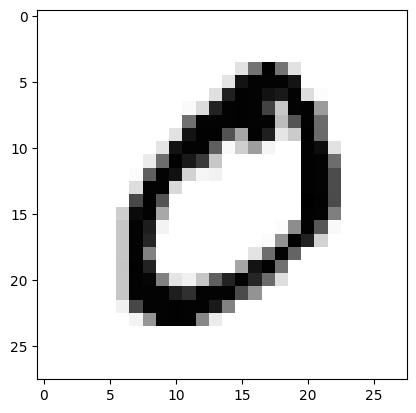

In [27]:
# show image 0
ex1 = X[0]
ex1_image = ex1.reshape(28, 28)
plt.imshow(ex1_image, cmap='Greys')
plt.show()

In [28]:
# label of image 0
y[0]

0.0

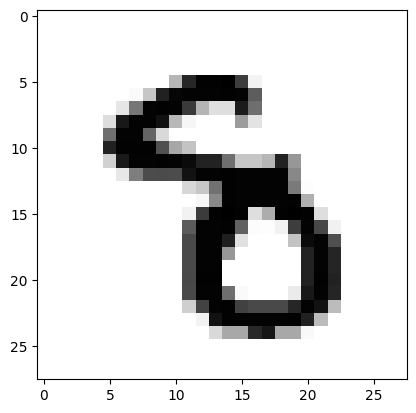

In [29]:
# show image 50000
ex1 = X[50000]
ex1_image = ex1.reshape(28, 28)
plt.imshow(ex1_image, cmap='Greys')
plt.show()

In [30]:
# label of image 50000
y[50000]

8.0

In [31]:
# train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

### One-hot encoding of class label

In [32]:
# function to encode class label to one-hot
# ex> 2 --> 0 0 1 0 0 0 0 0 0 0
def onehot(y, n_classes):

    # y is an array of labels
    # n_classes is number of different labels
    onehot = np.zeros((y.shape[0], n_classes))

    for idx, val in enumerate(y.astype(int)):
        onehot[idx, val] = 1.
    return onehot

In [33]:
# test onehot encoding
y = np.array([0, 1, 2, 0, 1, 2])
print(onehot(y, 3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Generating batchs for Stochastic Gradient Descent

In [34]:
# total number of data and total index
n_data = X_train.shape[0]
indices = np.arange(n_data)

print("total number of data = ", n_data)
print("indices = ", indices)

total number of data =  60000
indices =  [    0     1     2 ... 59997 59998 59999]


In [35]:
# test generating batch training data of size 10000
batch_size = 10000

# for 0, 10000, 20000, ...
for start_idx in range(0, indices.shape[0]-batch_size+1, batch_size):

    # each batch has 10000 data
    batch_idx = indices[start_idx : start_idx+batch_size]
    print("indices =", batch_idx, "batch data shape = ", X_train[batch_idx].shape)

indices = [   0    1    2 ... 9997 9998 9999] batch data shape =  (10000, 784)
indices = [10000 10001 10002 ... 19997 19998 19999] batch data shape =  (10000, 784)
indices = [20000 20001 20002 ... 29997 29998 29999] batch data shape =  (10000, 784)
indices = [30000 30001 30002 ... 39997 39998 39999] batch data shape =  (10000, 784)
indices = [40000 40001 40002 ... 49997 49998 49999] batch data shape =  (10000, 784)
indices = [50000 50001 50002 ... 59997 59998 59999] batch data shape =  (10000, 784)


### The Multilayer Perceptron class

In [51]:
import sys

class NeuralNetMLP(object):
    '''
    This model has 1 hidden layer

    n_hidden :   number of hidden units
    epochs :     number of epoches
    alpha :      learning rate
    shuffle :    if True, shuffle the training data each epoch
    batch_size : size of batch training set
    seed :       seed for random generation

    z_h, a_h : z and output of hidden layer
    z_o, a_o : z and output of output layer

    n_samples :  number of total data
    n_features : number of features of a data
    n_output :   numner of output (number of class labels)

    w_h, b_h : parameter of hidden layer. (n_features, n_hidden), (n_hidden)
    w_o, b_o : parameter of output layer. (n_hidden, n_output), (n_output)

    '''
    def __init__(self, n_hidden=100, epochs=100, alpha=0.01,
                 shuffle=True, batch_size=100, seed=None):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.epochs = epochs
        self.alpha = alpha
        self.shuffle = shuffle
        self.batch_size = batch_size

    # sigmoid function
    def _sigmoid(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))  # np.clip - preventing overflow

    # softmax function for 2D array
    def _softmax(self, z):
        exps = np.exp(z)
        return exps / np.sum(exps, axis=1, keepdims=True)

    # forward computation
    def _forward(self, X):

        # z and a of hidden layer. a = sigmoid(z)
        # (n_samples, n_features) dot (n_features, n_hidden) -> (n_samples, n_hidden)
        z_h = np.dot(X, self.w_h) + self.b_h
        a_h = self._sigmoid(z_h)

        # z and a of output layer. a = softmax(z)
        # (n_samples, n_hidden) dot (n_hidden, n_output) -> (n_samples, n_output)
        z_o = np.dot(a_h, self.w_o) + self.b_o
        a_o = self._softmax(z_o)

        return z_h, a_h, z_o, a_o

    # compute cost - cross entropy
    def _compute_cost(self, y_enc, output):

        # y_enc :  onehot endcoded y (n_samples, n_output (labels))
        # output : a_o of output layer (n_samples, n_output)
        cost = np.sum(-y_enc * (np.log(output + 1e-7))) / self.n_samples # output+1e-7 to prevent overflow

        return cost

    # predict class label
    def predict(self, X):

        # y_pred : index of max output (n_samples)
        z_h, a_h, z_o, a_o = self._forward(X)
        y_pred = np.argmax(a_o, axis=1)

        return y_pred

    # train the model
    def fit(self, X_train, y_train):

        # X_train : (n_samples, n_features)
        # y_train : (n_samples)
        self.n_samples = X_train.shape[0]
        self.n_features = X_train.shape[1]
        self.n_output = np.unique(y_train).shape[0]  # number of class labels

        # initialize parameters
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale=0.1, size=(self.n_features, self.n_hidden))
        self.b_o = np.zeros(self.n_output)
        self.w_o = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, self.n_output))

        # one-hot encoding y_train
        y_train_enc = onehot(y_train, self.n_output)

        # print the dimension of model
        print("number of input  = ", self.n_features)
        print("number of hidden = ", self.n_hidden)
        print("number of output = ", self.n_output)

        # record cost
        self.history = []

        # gradient descent for total epochs
        for i in range(self.epochs):

            indices = np.arange(self.n_samples)
            if self.shuffle:
                self.random.shuffle(indices)

            # for each batch
            for start_idx in range(0, indices.shape[0]-self.batch_size+1, self.batch_size):
                batch_idx = indices[start_idx:start_idx+self.batch_size]

                X = X_train[batch_idx]
                y = y_train_enc[batch_idx]

                # forward computation
                z_h, a_h, z_o, a_o = self._forward(X)

                # compute deltas
                delta_o = a_o - y                                        # [batch_size, n_output]
                delta_h = np.dot(delta_o, self.w_o.T) * a_h * (1. - a_h) # [batch_size, n_hidden]

                # compute gradients
                grad_w_o = np.dot(a_h.T, delta_o) / self.batch_size     # [n_hidden, n_output]
                grad_b_o = np.sum(delta_o, axis=0)/ self.batch_size
                grad_w_h = np.dot(X.T, delta_h) / self.batch_size        # [n_features, n_hidden]
                grad_b_h = np.sum(delta_h, axis=0) / self.batch_size

                # update parameters
                self.w_o = self.w_o - self.alpha * grad_w_o    # [n_hidden, n_output]
                self.b_o = self.b_o - self.alpha * grad_b_o
                self.w_h = self.w_h - self.alpha * grad_w_h     # [n_features, n_hidden]
                self.b_h = self.b_h - self.alpha * grad_b_h

            # record costs every epoch
            z_h, a_h, z_o, a_o = self._forward(X_train)
            cost = self._compute_cost(y_train_enc, a_o)
            print('Iteration %5d: Cost %f ' % (i, cost))
            self.history.append(cost)

        return self

### Training MLP

In [52]:
# multilayer perceptron with 1 hidden layer, 100 hidden units.
# stochastic gradient descent with batch size 100. learning rate = 0.01, epochs = 100

nn = NeuralNetMLP(n_hidden=100,
                  epochs=100,
                  alpha=0.01,
                  batch_size=100,
                  shuffle=True,
                  seed=1)

In [53]:
# train the network with 60000 training data
nn.fit(X_train, y_train)

number of input  =  784
number of hidden =  100
number of output =  10
Iteration     0: Cost 0.999109 
Iteration     1: Cost 0.678495 
Iteration     2: Cost 0.541050 
Iteration     3: Cost 0.468135 
Iteration     4: Cost 0.423162 
Iteration     5: Cost 0.387691 
Iteration     6: Cost 0.360107 
Iteration     7: Cost 0.345119 
Iteration     8: Cost 0.329559 
Iteration     9: Cost 0.313232 
Iteration    10: Cost 0.300030 
Iteration    11: Cost 0.290833 
Iteration    12: Cost 0.286214 
Iteration    13: Cost 0.277689 
Iteration    14: Cost 0.268581 
Iteration    15: Cost 0.261748 
Iteration    16: Cost 0.254265 
Iteration    17: Cost 0.248339 
Iteration    18: Cost 0.241209 
Iteration    19: Cost 0.235020 
Iteration    20: Cost 0.230696 
Iteration    21: Cost 0.228479 
Iteration    22: Cost 0.223697 
Iteration    23: Cost 0.224868 
Iteration    24: Cost 0.220010 
Iteration    25: Cost 0.213205 
Iteration    26: Cost 0.209801 
Iteration    27: Cost 0.206610 
Iteration    28: Cost 0.206317 
I

### Number of parameters

In [54]:
# check the total number of parameters
print("shape of w_h = ", nn.w_h.shape)
print("shape of b_h = ", nn.b_h.shape)
print("shape of w_o = ", nn.w_o.shape)
print("shape of b_o = ", nn.b_o.shape)
print("total number of parameters = ", nn.w_h.shape[0]*nn.w_h.shape[1] + nn.b_h.shape[0] + nn.w_o.shape[0]*nn.w_o.shape[1] + nn.b_o.shape[0])

shape of w_h =  (784, 100)
shape of b_h =  (100,)
shape of w_o =  (100, 10)
shape of b_o =  (10,)
total number of parameters =  79510


### Plot the cost change

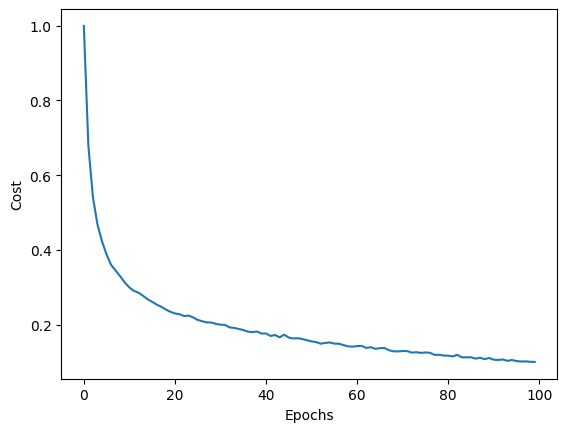

In [55]:
import matplotlib.pyplot as plt

# plot the loss - history
plt.plot([i for i in range(100)], nn.history)

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

### Accuracy of the model

In [57]:
# training accuracy
y_train_pred = nn.predict(X_train)
acc = np.sum(np.equal(y_train, y_train_pred)) / y_train.shape

print('train 정확도: %.2f%%' % (acc * 100))

# test accuracy
y_test_pred = nn.predict(X_test)
acc = np.sum(np.equal(y_test, y_test_pred)) / y_test.shape

print('test 정확도: %.2f%%' % (acc * 100))

train 정확도: 97.23%
test 정확도: 95.43%


### Classification test

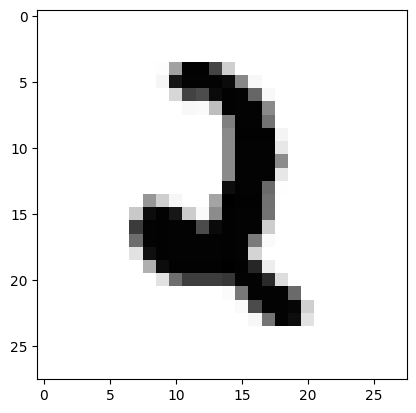

In [58]:
# show image 63000

ex = X[63000]
ex_image = ex.reshape(28, 28)
plt.imshow(ex_image, cmap='Greys')
plt.show()

In [59]:
# classification - predict label of image 63000
pred = nn.predict([ex])
print("The image is number : ", pred[0])

The image is number :  2


---


# 3. Multilayer perceptron using scikit learn

### Standardize data

In [60]:
from sklearn.preprocessing import StandardScaler

# standardize data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [61]:
y_train.shape

(60000,)

### Train MLPClassifier

In [62]:
from sklearn.neural_network import MLPClassifier

# Multilayer perceptron from scikit learn with 1 hidden layer, 100 hidden units
# stochastic gradient descent with batch size 100. learning rate = 0.01, L2 regularization parameter = 1e-1,
mlp = MLPClassifier(hidden_layer_sizes=(100), batch_size=100, max_iter=100, alpha=1e-1,
                    solver='sgd', verbose=10, tol=1e-4, random_state=0,
                    learning_rate_init=0.01)

mlp.fit(X_train_std, y_train)

Iteration 1, loss = 0.41689056
Iteration 2, loss = 0.25026337
Iteration 3, loss = 0.20809725
Iteration 4, loss = 0.18444219
Iteration 5, loss = 0.16713313
Iteration 6, loss = 0.15427066
Iteration 7, loss = 0.14313532
Iteration 8, loss = 0.13586182
Iteration 9, loss = 0.12837024
Iteration 10, loss = 0.12232528
Iteration 11, loss = 0.11778416
Iteration 12, loss = 0.11328087
Iteration 13, loss = 0.10974739
Iteration 14, loss = 0.10637758
Iteration 15, loss = 0.10370598
Iteration 16, loss = 0.10095428
Iteration 17, loss = 0.09835926
Iteration 18, loss = 0.09663742
Iteration 19, loss = 0.09553043
Iteration 20, loss = 0.09343205
Iteration 21, loss = 0.09240505
Iteration 22, loss = 0.09081009
Iteration 23, loss = 0.09006995
Iteration 24, loss = 0.08928516
Iteration 25, loss = 0.08832028
Iteration 26, loss = 0.08784616
Iteration 27, loss = 0.08727906
Iteration 28, loss = 0.08623176
Iteration 29, loss = 0.08509248
Iteration 30, loss = 0.08503916
Iteration 31, loss = 0.08472869
Iteration 32, los

MLPClassifier(alpha=0.1, batch_size=100, hidden_layer_sizes=100,
              learning_rate_init=0.01, max_iter=100, random_state=0,
              solver='sgd', verbose=10)

### Plot the cost change

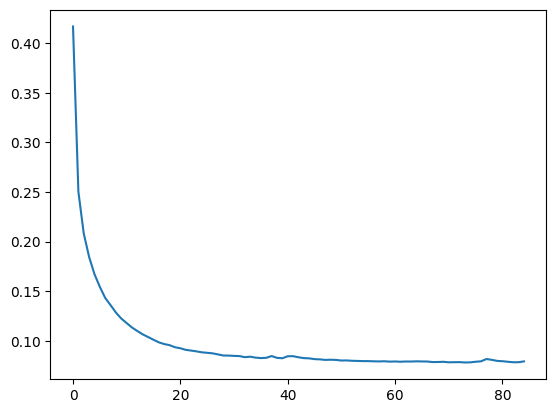

In [63]:
# plot the loss. use loss_curve_
plt.plot(mlp.loss_curve_)
plt.show()

### Accuracy of the model

In [65]:
# Train and test accuracy
acc = mlp.score(X_train_std, y_train)
print("Train accuracy : %.4f" % acc)
acc = mlp.score(X_test_std, y_test)
print("Train accuracy : %.4f" % acc)

Train accuracy : 0.9978
Train accuracy : 0.9779


### Classification test

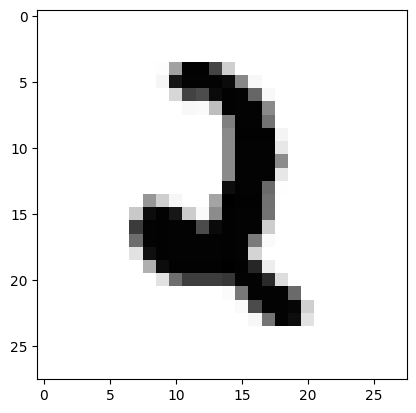

In [66]:
# show image 63000
ex = X[63000]
ex_image = ex.reshape(28, 28)
plt.imshow(ex_image, cmap='Greys')
plt.show()

In [67]:
# classification - predict label of image 63000
pred = nn.predict([ex])
print("The image is number : ", pred[0])

The image is number :  2


### Examples of incorrect classification

total 457 images are incorrectly classified
samples(t:true label, p:predicted label):


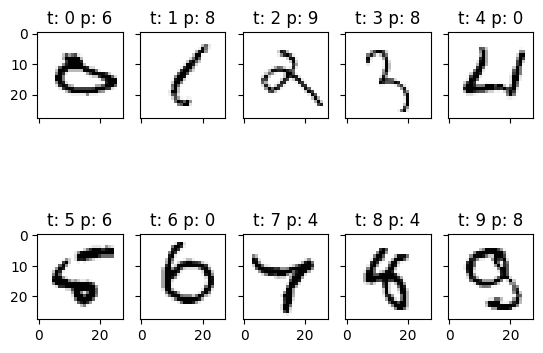

In [68]:
# check the incorrect results
mistake_img = X_test[y_test != y_test_pred]
true_lab = y_test[y_test != y_test_pred]
pred_lab = y_test_pred[y_test != y_test_pred]

print("total %d images are incorrectly classified" % mistake_img.shape[0])
print("samples(t:true label, p:predicted label):")

# show the misclassified image examples
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = mistake_img[true_lab == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    ax[i].set_title('t: %d p: %d' % (true_lab[true_lab == i][0], pred_lab[true_lab == i][0]))

plt.show()

### Number of parameters

In [69]:
# check the total number of parameters
# parameters are mlp.coefs_ and mlp.intercepts_
print("shape of w[0] ", mlp.coefs_[0].shape)
print("shape of b[0] ", mlp.intercepts_[0].shape)
print("shape of w[1] ", mlp.coefs_[1].shape)
print("shape of b[1] ", mlp.intercepts_[1].shape)
print("total number of parameters = ", mlp.coefs_[0].shape[0]*mlp.coefs_[0].shape[1] + mlp.intercepts_[0].shape[0]
                                     + mlp.coefs_[1].shape[0]*mlp.coefs_[1].shape[1] + mlp.intercepts_[1].shape[0])

shape of w[0]  (784, 100)
shape of b[0]  (100,)
shape of w[1]  (100, 10)
shape of b[1]  (10,)
total number of parameters =  79510


### Visualize parameters

In [70]:
# weights of hidden layer
mlp.coefs_[0].shape

(784, 100)

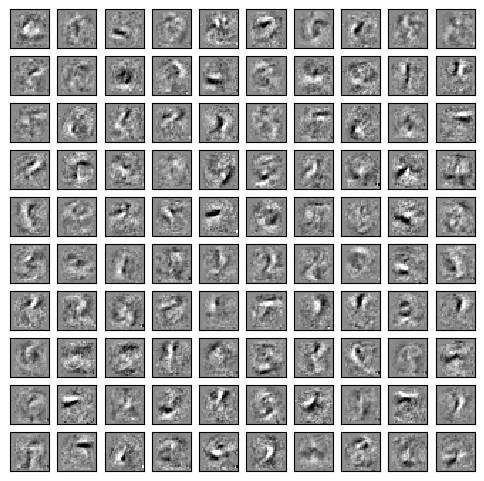

In [71]:
# display weights of hidden layer (784, 100)

fig, axes = plt.subplots(10, 10, figsize=(6, 6))
plt.figsize = 20

# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [72]:
# weights of output layer
mlp.coefs_[1].shape

(100, 10)

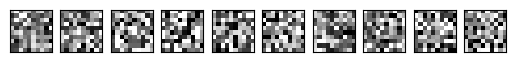

In [73]:
# display weights of output layer (100, 10)
fig, axes = plt.subplots(1, 10)

# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[1].min(), mlp.coefs_[1].max()
for coef, ax in zip(mlp.coefs_[1].T, axes.ravel()):
    ax.matshow(coef.reshape(10, 10), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()